In [54]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 加载数据集，生成特征和标签

In [55]:
df = pd.read_csv('dot.csv')
x_train, y_train = np.array(df[['x1', 'x2']]), np.array(df['y_c']).reshape(-1, 1)
Y_c = [['red' if y else 'blue'] for y in y_train]

In [56]:
x_train.shape, y_train.shape, df['y_c'].shape

((300, 2), (300, 1), (300,))

In [57]:
x_train.dtype, y_train.dtype

(dtype('float64'), dtype('int64'))

In [58]:
x_train = tf.cast(x_train, tf.float32)
y_train = tf.cast(y_train, tf.float32)

In [59]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)

# 构建、训练、测试模型

In [60]:
w1 = tf.Variable(tf.random.normal([2, 11]), dtype=tf.float32)
b1 = tf.Variable(tf.constant(0.01, shape=[11]))

w2 = tf.Variable(tf.random.normal([11, 1]), dtype=tf.float32)
b2 = tf.Variable(tf.constant(0.01, shape=[1]))

In [61]:
lr = 0.01
epoch = 400

In [62]:
for epoch in range(epoch):
    for step, (x_train, y_train) in enumerate(train_ds):
        with tf.GradientTape() as tape:
            h1 = tf.nn.relu(tf.matmul(x_train, w1) + b1)
            y = tf.matmul(h1, w2) + b2

            loss_mse = tf.reduce_mean(tf.square(y_train - y))
            
            loss_regularization = []
            loss_regularization.append(tf.nn.l2_loss(w1))
            loss_regularization.append(tf.nn.l2_loss(w2))
            loss_regular = tf.reduce_mean(loss_regularization)
            loss = loss_mse + 0.03 * loss_regular
        variables = [w1, b1, w2, b2]
        grads = tape.gradient(loss, variables)
        
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])
    if epoch % 20 == 0:
        print('Epoch: ', epoch,  'loss: ', float(loss))

Epoch:  0 loss:  1.8185410499572754
Epoch:  20 loss:  0.28017663955688477
Epoch:  40 loss:  0.2343384325504303
Epoch:  60 loss:  0.20984472334384918
Epoch:  80 loss:  0.19532790780067444
Epoch:  100 loss:  0.18432162702083588
Epoch:  120 loss:  0.17460308969020844
Epoch:  140 loss:  0.16587293148040771
Epoch:  160 loss:  0.15792514383792877
Epoch:  180 loss:  0.15050949156284332
Epoch:  200 loss:  0.14371006190776825
Epoch:  220 loss:  0.13747566938400269
Epoch:  240 loss:  0.13208022713661194
Epoch:  260 loss:  0.12709634006023407
Epoch:  280 loss:  0.1222364604473114
Epoch:  300 loss:  0.11774928867816925
Epoch:  320 loss:  0.1134081482887268
Epoch:  340 loss:  0.10932280123233795
Epoch:  360 loss:  0.10564370453357697
Epoch:  380 loss:  0.10222144424915314


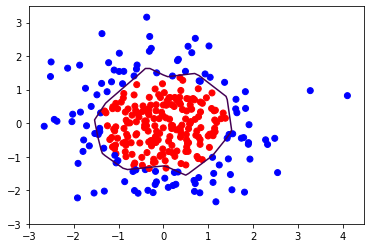

In [64]:
# xx在-3到3之间以步长为0.01，yy在-3到3之间以步长0.01,生成间隔数值点
xx, yy = np.mgrid[-3:3:.1, -3:3:.1]
# 将xx, yy拉直，并合并配对为二维张量，生成二维坐标点
grid = np.c_[xx.ravel(), yy.ravel()]
grid = tf.cast(grid, tf.float32)
probs = []
for x in grid:
    h1 = tf.nn.relu(tf.matmul([x], w1) + b1)
    y = tf.matmul(h1, w2) + b2
    probs.append(y)

x1, x2 = np.array(df[['x1']]), np.array(df[['x2']])
probs = np.array(probs).reshape(xx.shape)
plt.scatter(x1, x2, color=np.squeeze(Y_c))
# 把坐标xx yy和对应的值probs放入contour<[‘kɑntʊr]>函数，给probs值为0.5的所有点上色  plt点show后 显示的是红蓝点的分界线
plt.contour(xx, yy, probs, levels=[.5])
plt.show()


In [65]:
print(w1)

<tf.Variable 'Variable:0' shape=(2, 11) dtype=float32, numpy=
array([[ 0.03552862, -0.4172134 ,  0.29427648, -0.47966602,  0.20621294,
        -0.54049325, -0.0758716 , -0.10182538, -0.01201246, -0.4769843 ,
        -0.7690153 ],
       [-0.06665024,  0.05118326,  0.10787057,  0.7924308 ,  0.31363523,
         0.0093724 , -0.7019975 ,  0.1223644 , -0.44816852,  0.2621063 ,
        -0.20762292]], dtype=float32)>
